## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/WA_Fn_UseC__Telco_Customer_Churn.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df.take(5))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [0]:
# Create a view or table

temp_table_name = "Customer_Churn_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
df.printSchema()

root
-- customerID: string (nullable = true)
-- gender: string (nullable = true)
-- SeniorCitizen: integer (nullable = true)
-- Partner: string (nullable = true)
-- Dependents: string (nullable = true)
-- tenure: integer (nullable = true)
-- PhoneService: string (nullable = true)
-- MultipleLines: string (nullable = true)
-- InternetService: string (nullable = true)
-- OnlineSecurity: string (nullable = true)
-- OnlineBackup: string (nullable = true)
-- DeviceProtection: string (nullable = true)
-- TechSupport: string (nullable = true)
-- StreamingTV: string (nullable = true)
-- StreamingMovies: string (nullable = true)
-- Contract: string (nullable = true)
-- PaperlessBilling: string (nullable = true)
-- PaymentMethod: string (nullable = true)
-- MonthlyCharges: double (nullable = true)
-- TotalCharges: string (nullable = true)
-- Churn: string (nullable = true)

In [0]:
from pyspark.sql.functions import isnan , when , count , col
df.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+

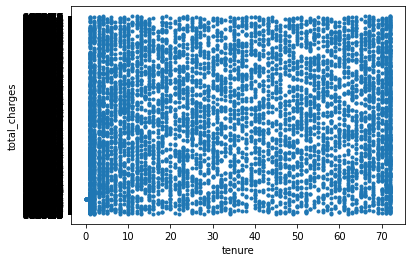

In [0]:
pd_df = df.toPandas()
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df["tenure"],pd_df["TotalCharges"],".")
plt.xlabel("tenure")
plt.ylabel("total_charges")
display()

In [0]:
df.groupBy("Churn").count().show()

+-----+-----+
Churn|count|
+-----+-----+
 No| 5174|
 Yes| 1869|
+-----+-----+

In [0]:
df.select("tenure","TotalCharges","MonthlyCharges").describe().show()

+-------+------------------+------------------+------------------+
summary| tenure| TotalCharges| MonthlyCharges|
+-------+------------------+------------------+------------------+
 count| 7043| 7043| 7043|
 mean| 32.37114865824223|2283.3004408418697| 64.76169246059922|
 stddev|24.559481023094442| 2266.771361883145|30.090047097678482|
 min| 0| | 18.25|
 max| 72| 999.9| 118.75|
+-------+------------------+------------------+------------------+

In [0]:
%sql
select gender , churn, count(*) from Customer_Churn_csv group by gender,Churn

gender,churn,count(1)
Male,No,2625
Male,Yes,930
Female,No,2549
Female,Yes,939


In [0]:
%sql
select SeniorCitizen, Churn , count(*) from Customer_Churn_csv group by SeniorCitizen,Churn

SeniorCitizen,Churn,count(1)
1,No,666
0,No,4508
0,Yes,1393
1,Yes,476


In [0]:
%sql 
select tenure,Churn, count(*) from Customer_Churn_csv group by tenure,Churn order by tenure

tenure,Churn,count(1)
0,No,11
1,No,233
1,Yes,380
2,No,115
2,Yes,123
3,No,106
3,Yes,94
4,No,93
4,Yes,83
5,No,69


In [0]:
df.stat.crosstab("SeniorCitizen","InternetService").show()

+-----------------------------+----+-----------+----+
SeniorCitizen_InternetService| DSL|Fiber optic| No|
+-----------------------------+----+-----------+----+
 1| 259| 831| 52|
 0|2162| 2265|1474|
+-----------------------------+----+-----------+----+

In [0]:
%sql
select PaperlessBilling,Churn,count(*) from Customer_Churn_csv group by PaperlessBilling,Churn

PaperlessBilling,Churn,count(1)
Yes,Yes,1400
No,No,2403
Yes,No,2771
No,Yes,469


In [0]:
%sql
select PaymentMethod,Churn,count(*) from Customer_Churn_csv group by PaymentMethod,Churn

PaymentMethod,Churn,count(1)
Credit card (automatic),No,1290
Bank transfer (automatic),No,1286
Mailed check,Yes,308
Credit card (automatic),Yes,232
Electronic check,No,1294
Electronic check,Yes,1071
Bank transfer (automatic),Yes,258
Mailed check,No,1304


In [0]:
churn_df = df
(train_data,test_data) = churn_df.randomSplit([0.7,0.3],24)
print(f"train_data: {train_data.count()}")
print(f"test_data: {test_data.count()}")


train_data: 4942
test_data: 2101

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder ,StringIndexer, VectorAssembler

catColumns = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",
             "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

In [0]:
stages = []

for catcol in catColumns:
  
  stringIndexer = StringIndexer(inputCol = catcol, outputCol = catcol + "Index")
  
  encoder = OneHotEncoder(inputCols = [stringIndexer.getOutputCol()], outputCols = [catcol + "catVec"])
  
  stages += [stringIndexer,encoder]

In [0]:
stages

Out[26]: [StringIndexer_7ddc4c608131,
 OneHotEncoder_5d70f327efe0,
 StringIndexer_fcbbceed95c9,
 OneHotEncoder_3f07b44cd725,
 StringIndexer_f35ca085a5eb,
 OneHotEncoder_c998015c0c75,
 StringIndexer_e0033c52cd51,
 OneHotEncoder_203804eed254,
 StringIndexer_fbe0aef18d70,
 OneHotEncoder_c842a729c776,
 StringIndexer_76a745b17fdd,
 OneHotEncoder_489aeab60c15,
 StringIndexer_70bf15603f74,
 OneHotEncoder_0d2d1966e5d4,
 StringIndexer_f64d67b8b0f8,
 OneHotEncoder_858d7d3fab4e,
 StringIndexer_01f53e5479d7,
 OneHotEncoder_6edf672ef400,
 StringIndexer_c2455dc07bf5,
 OneHotEncoder_3f6290707ca6,
 StringIndexer_518cdcb994cc,
 OneHotEncoder_f05ebb902906,
 StringIndexer_39d76cb0e4f8,
 OneHotEncoder_32b0e5748725,
 StringIndexer_dedc020de4b1,
 OneHotEncoder_439e9a4a4f61,
 StringIndexer_5d51413e76d4,
 OneHotEncoder_ef1aaf0ec869,
 StringIndexer_652eb49c11b9,
 OneHotEncoder_4e8289b0b7d6,
 StringIndexer_dd9fa0f3a7d4,
 OneHotEncoder_02c08fbc7c9c]

In [0]:
label_Idx = StringIndexer(inputCol="Churn",outputCol = "label")
stages += [label_Idx]


In [0]:
temp = label_Idx.fit(train_data).transform(train_data)
temp.show(1)

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|label|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
0002-ORFBO|Female| 0| Yes| Yes| 9| Yes| No| DSL| No| Yes| No| Yes| Yes| No|One year| Yes| Mailed check| 65.6| 593.3| No| 0.0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
only showing top 1 row

In [0]:
from pyspark.ml.feature import QuantileDiscretizer
tenure_bin = QuantileDiscretizer(inputCol = "tenure" ,numBuckets = 3 , outputCol = "tenure_bin" )
stages += [tenure_bin]

In [0]:
numCols = ["tenure_bin","MonthlyCharges"]
assembleInputs = [c + "catVec" for c in catColumns] + numCols
assembler = VectorAssembler(inputCols = assembleInputs , outputCol = "features")
stages += [assembler]


In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)

In [0]:
trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [0]:
trainprepDF.head(1)

Out[40]: [Row(customerID='0002-ORFBO', gender='Female', SeniorCitizen=0, Partner='Yes', Dependents='Yes', tenure=9, PhoneService='Yes', MultipleLines='No', InternetService='DSL', OnlineSecurity='No', OnlineBackup='Yes', DeviceProtection='No', TechSupport='Yes', StreamingTV='Yes', StreamingMovies='No', Contract='One year', PaperlessBilling='Yes', PaymentMethod='Mailed check', MonthlyCharges=65.6, TotalCharges='593.3', Churn='No', genderIndex=1.0, gendercatVec=SparseVector(1, {}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=1.0, PartnercatVec=SparseVector(1, {}), DependentsIndex=1.0, DependentscatVec=SparseVector(1, {}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=0.0, MultipleLinescatVec=SparseVector(2, {0: 1.0}), InternetServiceIndex=1.0, InternetServicecatVec=SparseVector(2, {1: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBackupIndex=1.0, OnlineBackupcatVec=SparseVector(2, {1: 1.0}), DeviceProtectionIndex=0.0, DeviceProtectioncatVec=SparseVector(2, {0: 1.0}), TechSupportIndex=1.0, TechSupportcatVec=SparseVector(2, {1: 1.0}), StreamingTVIndex=1.0, StreamingTVcatVec=SparseVector(2, {1: 1.0}), StreamingMoviesIndex=0.0, StreamingMoviescatVec=SparseVector(2, {0: 1.0}), ContractIndex=2.0, ContractcatVec=SparseVector(2, {}), PaperlessBillingIndex=0.0, PaperlessBillingcatVec=SparseVector(1, {0: 1.0}), PaymentMethodIndex=1.0, PaymentMethodcatVec=SparseVector(3, {1: 1.0}), label=0.0, tenure_bin=0.0, features=SparseVector(29, {1: 1.0, 4: 1.0, 5: 1.0, 8: 1.0, 9: 1.0, 12: 1.0, 13: 1.0, 16: 1.0, 18: 1.0, 19: 1.0, 23: 1.0, 25: 1.0, 28: 65.6}))]

In [0]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol = "label",featuresCol="features",maxIter = 10)
lrModel = lr.fit(trainprepDF)

In [0]:
summary = lrModel.summary
acc = summary.accuracy
falsepositive = summary.weightedFalsePositiveRate
truepositiverate = summary.weightedTruePositiveRate
Fvalue = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print(f"""accuracy: {acc},
False positivity rate: {falsepositive},
True positivity rate: {truepositiverate},
F value :{Fvalue},
precsion:{precision},
recall: {recall}""")

accuracy: 0.8047349251315257,
False positivity rate: 0.36287920021128467,
True positivity rate: 0.8047349251315257,
F value :0.7984926246247309,
precsion:0.7961582971523463,
recall: 0.8047349251315257

In [0]:
display(lrModel,trainprepDF,"ROC")

False Positive Rate,True Positive Rate,Threshold
0.0,0.0,0.8328895166451664
0.0,0.029411764705882353,0.8328895166451664
0.0,0.058823529411764705,0.8208970659486171
0.0,0.08823529411764706,0.8027985511298473
0.013333333333333334,0.08823529411764706,0.7671391662834024
0.013333333333333334,0.11764705882352941,0.7420237776049148
0.02666666666666667,0.11764705882352941,0.7415030877851138
0.02666666666666667,0.14705882352941177,0.7372651525253646
0.04,0.14705882352941177,0.7273512680662639
0.04,0.17647058823529413,0.7182733442748295


In [0]:
display(lrModel,trainprepDF,"fittedVsResiduals")

fitted values,residuals
-0.6094671634962856,-0.3521807547085404
1.4038780227962901,0.19720144887015267
-0.7895690331474514,0.6877387861526577
-0.3856739297353774,0.5952408536208256
0.05072529941752546,-0.5126786064072661
0.014468122823499185,0.4963830323878595
-2.078888484854187,-0.1111657457567703
-4.814989552308117,-0.008042106951886119
-0.8116663995320116,0.6924644902167316
-4.862562268057711,-0.007671345999183954


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrModel.transform(testprepDF)
evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol="prediction")
area_under_curve = evaluatorLR.evaluate(predictions)
print(area_under_curve)
evaluatorLR.getMetricName()

0.700129228377816
Out[51]: 'areaUnderROC'

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "WA_Fn_UseC__Telco_Customer_Churn_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)